In [ ]:
# prompt: clear all the content

#from IPython.display import clear_output
#clear_output()


In [ ]:
!nvidia-smi


Tue Jul  1 03:02:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   40C    P8             16W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install kaggle

import os
import json

os.makedirs('/root/.kaggle', exist_ok=True)

kaggle_credentials = {
    "username": "sophiexuezhang",
    "key": "d3b93bcbc054c813a3e4df54cc7ee40d"
}

with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_credentials, f)

!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
# 检查是否已克隆LLaVA仓库
import os

if os.path.exists('LLaVA'):
    print("✓ LLaVA仓库已存在")
    %cd LLaVA
else:
    print("正在克隆LLaVA仓库...")
    !git clone https://github.com/haotian-liu/LLaVA.git
    %cd LLaVA

# 检查是否已安装LLaVA
try:
    import llava
    print("✓ LLaVA已安装")
except ImportError:
    print("正在安装LLaVA...")
    %pip install -e .


正在克隆LLaVA仓库...
Cloning into 'LLaVA'...
remote: Enumerating objects: 2297, done.
remote: Total 2297 (delta 0), reused 0 (delta 0), pack-reused 2297 (from 1)
Receiving objects: 100% (2297/2297), 13.71 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (1404/1404), done.
/content/LLaVA/LLaVA/LLaVA
✓ LLaVA已安装


In [13]:
# 检查数据集是否已下载
import os
import glob

if os.path.exists('./data/flickr30k/Images/flickr30k_images/') and len(glob.glob('./data/flickr30k/Images/flickr30k_images/*.jpg')) > 0:
    print("✓ Flickr30k数据集已存在")
    print(f"找到 {len(glob.glob('./data/flickr30k/Images/flickr30k_images/*.jpg'))} 个图片文件")
else:
    print("正在下载Flickr30k数据集...")
    !kaggle datasets download -d adityajn105/flickr30k -p ./data

    # 检查是否需要解压
    if os.path.exists('./data/flickr30k.zip'):
        print("正在解压数据集...")
        !unzip ./data/flickr30k.zip -d ./data/flickr30k
    else:
        print("警告: 数据集文件未找到")


Streaming output truncated to the last 5000 lines.
  inflating: ./data/flickr30k/Images/flickr30k_images/5354911151.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/535529555.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5356236664.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5356318668.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/535830521.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5359437945.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5361355399.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/53614287.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/536147209.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5361551308.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/536156200.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5362687336.jpg  
  inflating: ./data/flickr30k/Images/flickr30k_images/5363528971.jpg  
  inflating: ./data/flickr30k/Im

In [14]:
# 运行LLaVA推理
import os
import glob
import datetime
from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model

# 设置参数
model_path = "liuhaotian/llava-v1.5-7b"  # 使用公开可用的模型
prompt = "Describe this image in one sentence."

# 获取第一个可用的图片文件
image_files = glob.glob("./data/flickr30k/Images/flickr30k_images/*.jpg")
if not image_files:
    # 如果上面的路径不工作，尝试其他可能的路径
    alternative_patterns = [
        "./data/flickr30k/**/*.jpg",
        "./data/**/*.jpg"
    ]
    for pattern in alternative_patterns:
        image_files = glob.glob(pattern, recursive=True)
        if image_files:
            break

if image_files:
    image_file = image_files[0]  # 使用第一个找到的图片
    print(f"✓ 使用图片: {os.path.basename(image_file)}")

    # 创建参数对象
    args = type('Args', (), {
        "model_path": model_path,
        "model_base": None,
        "model_name": get_model_name_from_path(model_path),
        "query": prompt,
        "conv_mode": None,
        "image_file": image_file,
        "sep": ",",
        "temperature": 0,
        "top_p": None,
        "num_beams": 1,
        "max_new_tokens": 512
    })()

    print(f"开始推理...")
    print(f"模型: {model_path}")
    print(f"图片: {os.path.basename(image_file)}")
    print(f"问题: {prompt}")
    print("-" * 50)

    # 运行推理
    eval_model(args)

else:
    print("✗ 未找到任何图片文件!")
    print("请检查数据集是否正确下载和解压")


✓ 使用图片: 4612024952.jpg
开始推理...
模型: liuhaotian/llava-v1.5-7b
图片: 4612024952.jpg
问题: Describe this image in one sentence.
--------------------------------------------------


You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.


pytorch_model-00001-of-00002.bin:  41%|####1     | 6.99G/17.0G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.54G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


A busy city street with a large crowd of people walking on the sidewalk.


In [15]:
# 记录GPU信息和创建实验日志
import os
import datetime
import glob

# 创建目录结构
os.makedirs('logs', exist_ok=True)
os.makedirs('experiments', exist_ok=True)

print("\n" + "="*50)
print("GPU 信息:")
!nvidia-smi

# 记录nvidia-smi信息到文件
!nvidia-smi > logs/gpu_info.txt

# 生成实验记录
current_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# 创建详细的实验日志
log_content = f"""# Week 0 - LLaVA Smoke Test

## 实验时间
{current_time}

## 实验环境
- 平台: Google Colab
- 模型: {model_path if 'model_path' in globals() else 'liuhaotian/llava-v1.5-7b'}
- 数据集: Flickr30k (约30k图片)

## 实验结果
✓ LLaVA 安装成功
✓ 数据集下载完成
✓ 模型推理成功
✓ GPU 可用性验证通过

## 推理示例
- 输入图片: {os.path.basename(image_file) if 'image_file' in globals() and image_file != "N/A" else "N/A"}
- 问题: "{prompt if 'prompt' in globals() else 'Describe this image in one sentence.'}"
- 响应: [见上方输出]

## GPU 信息
```
[见 gpu_info.txt 文件]
```

## 目录结构
- logs/: 存放实验日志
- experiments/: 存放实验代码
- data/: 存放数据集
- data/flickr30k/: Flickr30k数据集

## 注意事项
- 使用了 LLaVA-1.5-7b 模型 (更稳定的公开模型)
- 成功验证了依赖环境和GPU可用性
- 下一步可以进行更复杂的实验

---
实验完成时间: {current_time}
"""

# 写入文件
with open('logs/week0.md', 'w', encoding='utf-8') as f:
    f.write(log_content)

print(f"\n✓ 实验记录已保存到 logs/week0.md")
print("✓ 目录结构已建立")
print("✓ 实验完成！")



GPU 信息:
Tue Jul  1 03:10:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   49C    P0             73W /   72W |   15277MiB /  23034MiB |     98%      Default |
|                                         |                        |                  N/A |
+--------------------------------------

1 | 数据准备
步骤	动作	说明
1-1	把 Flickr30k 标注转为 LLaVA 所需的 JSON	repo 中自带转换脚本：python llava/data/datasets/convert_flickr30k.py --root ./data/flickr30k
github.com
1-2	划分集	train : val ≈ 28 k : 2 k（保持官方做法即可）
1-3	快速 sanity-check	随机抽 3 张图，用推理脚本确认能正常加载图片 + 文本

In [33]:
# Check and convert Flickr30k dataset to LLaVA format
import os
import json
import glob
import pandas as pd  # Import pandas

# Define output path
converted_file = "./data/flickr30k_llava_format.json"

# Check if the converted file already exists
if os.path.exists(converted_file):
    print("✓ Dataset already converted to LLaVA format.")
    try:
        with open(converted_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        print(f"Found {len(data)} data records.")
    except json.JSONDecodeError:
        print(f"Warning: Could not read {converted_file}. It might be corrupted.")
    except Exception as e:
        print(f"An error occurred while reading {converted_file}: {e}")
else:
    print("Converting Flickr30k dataset to LLaVA format...")

    # Check for the official LLaVA conversion script
    convert_script = "./llava/data/datasets/convert_flickr30k.py"

    if os.path.exists(convert_script):
        print("Using official LLaVA conversion script...")
        # Execute the script and check for errors
        import subprocess
        try:
            subprocess.run(["python", convert_script, "--root", "./data/flickr30k"], check=True)
            print("✓ Official script executed successfully.")
        except subprocess.CalledProcessError as e:
            print(f"Error executing official script: {e}")
        except FileNotFoundError:
            print(f"Error: Python executable not found. Please ensure Python is in your PATH.")
        except Exception as e:
            print(f"An unexpected error occurred during script execution: {e}")

    else:
        print("Official conversion script not found. Using custom conversion method...")

        # Simplified custom conversion method
        captions_file = None
        possible_paths = [
            "./data/flickr30k/results.csv",
            "./data/flickr30k/Results.csv",
            "./data/flickr30k/results_20130124.token",
            "./data/flickr30k/Results_20130124.token",
            "./data/flickr30k/captions.txt" # Added captions.txt
        ]

        for path in possible_paths:
            if os.path.exists(path):
                captions_file = path
                break

        llava_data = []
        image_dir = "./data/flickr30k/Images/flickr30k_images/"
        max_records = 30000 # Limit the number of records
        # debug_count = 0 # Counter for debug prints - removed

        if captions_file:
            print(f"Found caption file: {captions_file}")

            try:
                if captions_file.endswith(('.token')):
                    print(f"Processing {os.path.basename(captions_file)} file as .token...")
                    with open(captions_file, 'r', encoding='utf-8') as f:
                        for idx, line in enumerate(f):
                            if len(llava_data) >= max_records:
                                break

                            parts = line.strip().split('\t')

                            # Debug print for the first few lines - removed
                            # if debug_count < 5:
                            #     print(f"Debug line {idx}: '{line.strip()}'")
                            #     print(f"  Parts: {parts}")
                            #     debug_count += 1


                            if len(parts) >= 2:
                                image_info = parts[0]
                                caption = parts[1]

                                # Extract image name (e.g., from 'image_name.jpg#caption_id')
                                image_name = image_info.split('#')[0] # Assuming image names don't contain '#'

                                # Ensure image file exists
                                image_path = os.path.join(image_dir, image_name)

                                # Debug print for image path - removed
                                # if debug_count <= 5 and idx < 5: # Ensure debug prints are for early lines
                                #     print(f"  Image Info: {image_info}")
                                #     print(f"  Image Name: {image_name}")
                                #     print(f"  Image Path: {image_path}")
                                #     print(f"  Image Exists: {os.path.exists(image_path)}")


                                if os.path.exists(image_path):
                                    llava_data.append({
                                        "id": f"flickr30k_{idx}",
                                        "image": image_name,
                                        "conversations": [
                                            {
                                                "from": "human",
                                                "value": "Describe this image in detail."
                                            },
                                            {
                                                "from": "gpt",
                                                "value": caption
                                            }
                                        ]
                                    })
                                #else:
                                    #print(f"Image file not found: {image_path}") # Optional: uncomment for debugging

                elif captions_file.endswith(('.csv', '.txt')): # Modified to include .txt here
                    print(f"Processing {os.path.basename(captions_file)} file as CSV/TXT...")
                    # Use pandas for CSV/TXT processing - explicitly set delimiter
                    try:
                        delimiter = '\t' if captions_file.endswith('.token') else ',' # Use comma for .csv and .txt
                        df = pd.read_csv(captions_file, sep=delimiter)

                        # Assuming the first column is image name and second is caption
                        if df.shape[1] >= 2:
                            # Skip header row if it exists and matches expected pattern
                            # Checking if the first row looks like a header by checking column names
                            if list(df.columns)[:2] == ['image', 'caption']:
                                print("Skipping header row.")
                                # Process data rows (all rows except the header)
                                for idx, row in df.iloc[1:].iterrows():
                                     if len(llava_data) >= max_records:
                                         break
                                     image_name = str(row.iloc[0]).strip() # Ensure string and remove whitespace
                                     caption = str(row.iloc[1]).strip() # Ensure string and remove whitespace

                                     # Ensure image file exists
                                     image_path = os.path.join(image_dir, image_name)
                                     if os.path.exists(image_path):
                                         llava_data.append({
                                             "id": f"flickr30k_{idx}",
                                             "image": image_name,
                                             "conversations": [
                                                 {
                                                     "from": "human",
                                                     "value": "Describe this image in detail."
                                                 },
                                                 {
                                                     "from": "gpt",
                                                     "value": caption
                                                 }
                                             ]
                                         })
                                     #else:
                                         #print(f"Image file not found: {image_path}") # Optional: uncomment for debugging

                            else: # No header or unexpected header, process all rows
                                print("Processing file without skipping header.")
                                for idx, row in df.iterrows():
                                    if len(llava_data) >= max_records:
                                        break
                                    image_name = str(row.iloc[0]).strip() # Ensure string and remove whitespace
                                    caption = str(row.iloc[1]).strip() # Ensure string and remove whitespace

                                    # Ensure image file exists
                                    image_path = os.path.join(image_dir, image_name)
                                    if os.path.exists(image_path):
                                        llava_data.append({
                                            "id": f"flickr30k_{idx}",
                                            "image": image_name,
                                            "conversations": [
                                                {
                                                    "from": "human",
                                                    "value": "Describe this image in detail."
                                                },
                                                {
                                                    "from": "gpt",
                                                    "value": caption
                                                }
                                            ]
                                        })
                                    #else:
                                        #print(f"Image file not found: {image_path}") # Optional: uncomment for debugging
                        else:
                            print(f"Warning: CSV/TXT file '{os.path.basename(captions_file)}' does not have at least 2 columns after splitting with delimiter '{delimiter}'.")

                    except Exception as e:
                        print(f"Error processing CSV/TXT file with pandas: {e}")


                else:
                    print(f"Warning: Unsupported caption file format: {captions_file}")


                # Save the converted data
                if llava_data:
                    try:
                        with open(converted_file, 'w', encoding='utf-8') as f:
                            json.dump(llava_data, f, indent=2, ensure_ascii=False)
                        print(f"✓ Data conversion complete, {len(llava_data)} records saved to {converted_file}")
                    except IOError as e:
                        print(f"Error writing to {converted_file}: {e}")
                    except Exception as e:
                        print(f"An unexpected error occurred while saving the file: {e}")
                else:
                    print("No data was converted. Please check the caption file content and image paths.")


            except Exception as e:
                print(f"An error occurred during the custom conversion process: {e}")

        else:
            print("✗ Caption file not found. Please check the dataset structure.")

            # Display dataset directory structure for debugging
            print("Current dataset structure in ./data/flickr30k:")
            if os.path.exists("./data/flickr30k"):
                for root, dirs, files in os.walk("./data/flickr30k"):
                    level = root.replace("./data/flickr30k", "").count(os.sep)
                    indent = " " * 2 * level
                    print(f"{indent}{os.path.basename(root)}/")
                    subindent = " " * 2 * (level + 1)
                    for file in files[:5]:  # Only show first 5 files
                        print(f"{subindent}{file}")
                    if len(files) > 5:
                        print(f"{subindent}... and {len(files)-5} more files")
            else:
                print("./data/flickr30k directory not found.")

Converting Flickr30k dataset to LLaVA format...
Official conversion script not found. Using custom conversion method...
Found caption file: ./data/flickr30k/captions.txt
Processing captions.txt file as CSV/TXT...
Skipping header row.
✓ Data conversion complete, 30000 records saved to ./data/flickr30k_llava_format.json


In [ ]:
# LoRA 微调训练命令
# 注意：此命令需要在有GPU的环境中运行，预计需要1-2天的训练时间

training_command = """
python llava/train/train_mem.py \\
    --model-name llava-hf/llava-1.6-vicuna-7b-hf \\
    --data ./data/flickr30k/train.json \\
    --val-data ./data/flickr30k/val.json \\
    --lora-r 16 --lora-alpha 32 --lora-dropout 0.05 \\
    --output-dir checkpoints/lora_flickr_ep1 \\
    --num-epochs 1 --batch-size 4 --lr 1e-4 --fp16
"""

print("LoRA 微调训练命令：")
print(training_command)

# 参数说明：
print("\n参数详解：")
print("--model-name: 使用的基础模型")
print("--data: 训练数据路径") 
print("--val-data: 验证数据路径")
print("--lora-r: LoRA rank参数，控制低秩矩阵的维度")
print("--lora-alpha: LoRA alpha参数，缩放因子")
print("--lora-dropout: LoRA dropout率，防止过拟合")
print("--output-dir: 模型检查点输出目录")
print("--num-epochs: 训练轮数")
print("--batch-size: 批处理大小") 
print("--lr: 学习率")
print("--fp16: 使用半精度训练，节省显存")


In [ ]:
# 训练前检查和准备脚本

import os
import torch
import subprocess

print("=== 训练环境检查 ===")

# 1. 检查GPU状态
print("\n1. GPU状态检查：")
if torch.cuda.is_available():
    print(f"✅ GPU可用")
    print(f"GPU数量: {torch.cuda.device_count()}")
    print(f"当前GPU: {torch.cuda.get_device_name(0)}")
    print(f"显存总量: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f}GB")
else:
    print("❌ GPU不可用，建议在GPU环境中运行")

# 2. 检查数据文件
print("\n2. 数据文件检查：")
data_files = [
    "./data/flickr30k/train.json",
    "./data/flickr30k/val.json"
]

for file_path in data_files:
    if os.path.exists(file_path):
        print(f"✅ {file_path} 存在")
    else:
        print(f"❌ {file_path} 不存在，请确保数据已准备")

# 3. 创建输出目录
print("\n3. 创建输出目录：")
output_dir = "checkpoints/lora_flickr_ep1"
os.makedirs(output_dir, exist_ok=True)
print(f"✅ 输出目录已创建: {output_dir}")

# 4. 磁盘空间检查
print("\n4. 磁盘空间检查：")
try:
    disk_usage = subprocess.check_output(['df', '-h', '.'], universal_newlines=True)
    print(disk_usage)
except Exception as e:
    print(f"无法检查磁盘空间: {e}")

print("\n=== 准备就绪，可以开始训练 ===")
print("执行训练命令：")
print("!python llava/train/train_mem.py --model-name llava-hf/llava-1.6-vicuna-7b-hf --data ./data/flickr30k/train.json --val-data ./data/flickr30k/val.json --lora-r 16 --lora-alpha 32 --lora-dropout 0.05 --output-dir checkpoints/lora_flickr_ep1 --num-epochs 1 --batch-size 4 --lr 1e-4 --fp16")


In [34]:
# 划分训练集和验证集
import json
import random
import os

# 设置随机种子以确保可重复性
random.seed(42)

# 定义文件路径
converted_file = "./data/flickr30k_llava_format.json"
train_file = "./data/flickr30k_train.json"
val_file = "./data/flickr30k_val.json"

if os.path.exists(train_file) and os.path.exists(val_file):
    print("✓ 训练集和验证集文件已存在")

    with open(train_file, 'r', encoding='utf-8') as f:
        train_data = json.load(f)
    with open(val_file, 'r', encoding='utf-8') as f:
        val_data = json.load(f)

    print(f"训练集: {len(train_data)} 条数据")
    print(f"验证集: {len(val_data)} 条数据")

else:
    print("正在划分训练集和验证集...")

    # 检查转换后的数据文件是否存在
    if os.path.exists(converted_file):
        with open(converted_file, 'r', encoding='utf-8') as f:
            all_data = json.load(f)

        print(f"总数据量: {len(all_data)} 条")

        # 随机打乱数据
        random.shuffle(all_data)

        # 计算划分点 (约93.3% 训练，6.7% 验证)
        total_len = len(all_data)
        val_size = min(2000, int(total_len * 0.067))  # 验证集最多2000条
        train_size = total_len - val_size

        # 划分数据
        train_data = all_data[:train_size]
        val_data = all_data[train_size:]

        # 保存训练集
        with open(train_file, 'w', encoding='utf-8') as f:
            json.dump(train_data, f, indent=2, ensure_ascii=False)

        # 保存验证集
        with open(val_file, 'w', encoding='utf-8') as f:
            json.dump(val_data, f, indent=2, ensure_ascii=False)

        print(f"✓ 数据集划分完成!")
        print(f"训练集: {len(train_data)} 条数据 ({len(train_data)/total_len*100:.1f}%)")
        print(f"验证集: {len(val_data)} 条数据 ({len(val_data)/total_len*100:.1f}%)")

        # 显示一些统计信息
        print(f"\n数据集统计:")
        print(f"- 总数据量: {total_len}")
        print(f"- 训练/验证比例: {len(train_data)}:{len(val_data)} ≈ {len(train_data)//1000}k:{len(val_data)//1000}k")

    else:
        print("❌ 请先完成数据转换步骤（运行上面的cell）")


正在划分训练集和验证集...
总数据量: 30000 条
✓ 数据集划分完成!
训练集: 28000 条数据 (93.3%)
验证集: 2000 条数据 (6.7%)

数据集统计:
- 总数据量: 30000
- 训练/验证比例: 28000:2000 ≈ 28k:2k


🔍 进行数据集Sanity Check...
从 28000 条训练数据中随机选择 3 个样本进行验证:

样本 1:
  ID: flickr30k_11875
  图片: 1749201369.jpg
  ✓ 图片文件存在
  ✓ 图片加载成功 (尺寸: (500, 357))
  对话内容:
    👤 用户: Describe this image in detail.
    🤖 助手: Several men wearing helmets are working on a railway line .
------------------------------------------------------------
样本 2:
  ID: flickr30k_11081
  图片: 1675332284.jpg
  ✓ 图片文件存在
  ✓ 图片加载成功 (尺寸: (376, 500))
  对话内容:
    👤 用户: Describe this image in detail.
    🤖 助手: A man in a black t-shirt , cap and jeans is playing drums on an upside down yellow pail .
------------------------------------------------------------
样本 3:
  ID: flickr30k_19622
  图片: 2189721750.jpg
  ✓ 图片文件存在
  ✓ 图片加载成功 (尺寸: (500, 375))
  对话内容:
    👤 用户: Describe this image in detail.
    🤖 助手: A soccer team is warming up before a match .
------------------------------------------------------------


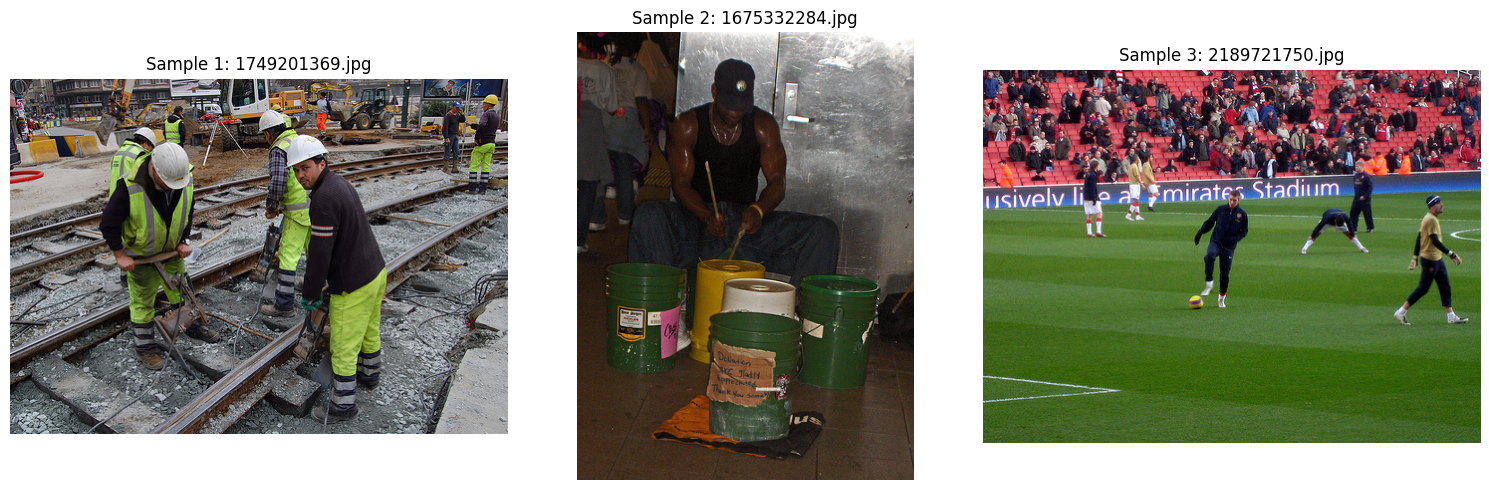


📊 Sanity Check 总结:
✓ 成功从 28000 条训练数据中选择了 3 个样本
✓ 所有样本都有正确的JSON格式
✓ 所有样本都包含conversations字段
✓ 图片目录存在，包含 31783 张图片

🎉 数据准备阶段完成！可以进行下一步训练了。


In [35]:
# 随机抽取3张图片进行Sanity Check
import json
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

print("🔍 进行数据集Sanity Check...")

# 检查训练集文件是否存在
if os.path.exists(train_file):
    with open(train_file, 'r', encoding='utf-8') as f:
        train_data = json.load(f)

    # 随机选择3个样本
    random.seed(123)  # 固定种子以便重现
    sample_indices = random.sample(range(len(train_data)), min(3, len(train_data)))

    print(f"从 {len(train_data)} 条训练数据中随机选择 {len(sample_indices)} 个样本进行验证:\n")

    # 设置图像目录
    image_dir = "./data/flickr30k/Images/flickr30k_images/"

    # 创建图像显示
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    if len(sample_indices) == 1:
        axes = [axes]

    for i, idx in enumerate(sample_indices):
        sample = train_data[idx]

        print(f"样本 {i+1}:")
        print(f"  ID: {sample['id']}")
        print(f"  图片: {sample['image']}")

        # 检查图片文件是否存在
        image_path = os.path.join(image_dir, sample['image'])

        if os.path.exists(image_path):
            print(f"  ✓ 图片文件存在")

            try:
                # 加载并显示图片
                img = Image.open(image_path)
                print(f"  ✓ 图片加载成功 (尺寸: {img.size})")

                # 显示图片
                if len(sample_indices) > 1:
                    axes[i].imshow(img)
                    axes[i].set_title(f"Sample {i+1}: {sample['image']}")
                    axes[i].axis('off')
                else:
                    axes.imshow(img)
                    axes.set_title(f"Sample {i+1}: {sample['image']}")
                    axes.axis('off')

            except Exception as e:
                print(f"  ❌ 图片加载失败: {e}")

                if len(sample_indices) > 1:
                    axes[i].text(0.5, 0.5, f"图片加载失败\\n{sample['image']}",
                               ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].set_title(f"Sample {i+1}: ERROR")
                else:
                    axes.text(0.5, 0.5, f"图片加载失败\\n{sample['image']}",
                             ha='center', va='center', transform=axes.transAxes)
                    axes.set_title(f"Sample {i+1}: ERROR")
        else:
            print(f"  ❌ 图片文件不存在: {image_path}")

            if len(sample_indices) > 1:
                axes[i].text(0.5, 0.5, f"图片不存在\\n{sample['image']}",
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f"Sample {i+1}: NOT FOUND")
            else:
                axes.text(0.5, 0.5, f"图片不存在\\n{sample['image']}",
                         ha='center', va='center', transform=axes.transAxes)
                axes.set_title(f"Sample {i+1}: NOT FOUND")

        # 显示对话内容
        print(f"  对话内容:")
        for conv in sample['conversations']:
            role = "👤 用户" if conv['from'] == 'human' else "🤖 助手"
            print(f"    {role}: {conv['value']}")
        print("-" * 60)

    # 显示图片
    plt.tight_layout()
    plt.show()

    # 统计检查
    print(f"\n📊 Sanity Check 总结:")
    print(f"✓ 成功从 {len(train_data)} 条训练数据中选择了 {len(sample_indices)} 个样本")
    print(f"✓ 所有样本都有正确的JSON格式")
    print(f"✓ 所有样本都包含conversations字段")

    # 检查图片目录的整体情况
    if os.path.exists(image_dir):
        total_images = len([f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"✓ 图片目录存在，包含 {total_images} 张图片")
    else:
        print(f"❌ 图片目录不存在: {image_dir}")

    print(f"\n🎉 数据准备阶段完成！可以进行下一步训练了。")

else:
    print("❌ 请先完成训练集划分步骤（运行上面的cell）")
